In [1]:
#Выявить параметры, оказывающие влияние на получение высоких оценок по математике
# Этапы: 0. изучение задачи. 1. работа с данными- переименование столбцов. 
#2. Первичный анализ всех данных по столбцам с построением функций для автоматизации повторяющихся действий. 
#3. анализ числовых и номинативных данных. 4. Вывод

#Вывод: На оценки по математике влияние оказывает: семья, а именно мамино образование, 
#ее время уделяемое семье, мотивированность к высшему образованию, 
#место проживания учащегося – как среда, время затрачиваемое его на обучение


import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from itertools import combinations

from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # выведем больше строк

pd.set_option('display.max_columns', 50) # выведем больше колонок

students = pd.read_csv('stud_math.xls')
display(students.head(10))
students.info() # анализ данных

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [2]:
# Primary data processing
# 1-change title

def change_title(tit):
# изменение заголовков на удобный вид
    if tit == 'famsize':
        tit='family_size'
    if tit == 'Pstatus':
        tit='parent_status'
    if tit == 'Medu':
        tit='mum_edu'
    if tit == 'Fedu':
        tit='papa_edu'#
    if tit == 'Mjob':
        tit='mum_job'#
    if tit == 'Fjob':
        tit='papa_job'#
    if tit == 'studytime, granular':
        tit='study_granular'#
    if tit == 'famrel':
        tit='family_relation'# 
    if tit == 'goout':
        tit='go_out'# 
    if tit == 'score':
        tit='score_math'#
    return tit


title_col=students.columns
for title in title_col:
    students.rename(columns=lambda x: x.replace(title, change_title(title)), inplace=True)  
    
students.columns

Index(['school', 'sex', 'age', 'address', 'family_size', 'parent_status',
       'mum_edu', 'papa_edu', 'mum_job', 'papa_job', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'study_granular', 'higher', 'internet',
       'romantic', 'family_relation', 'freetime', 'go_out', 'health',
       'absences', 'score_math'],
      dtype='object')

In [4]:
def analyz_text_col(data_text):
#function for analyz text's the datas
    print(' Data ',data_text.name.upper())
    print(data_text.name,' количество уникальных данных=',data_text.nunique())
    display(pd.DataFrame(data_text.value_counts()))
    print('количество отсутствующих данных = ',data_text.isnull().sum())
    

In [12]:
def correct_absent(data_text):
    # function for cleaning incorrect data
    data_text = data_text.astype(str).apply(lambda x: None if x.strip() == 'None' else x)
    data_text = data_text.astype(str).apply(lambda x: None if x.strip() == '-1.0' else x)
    data_text = data_text.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)
    data_text = data_text.astype(str).apply(lambda x: None if x.strip() == '40.0' else x)
    return data_text

In [26]:
def analyz_eject(data_text):
    # emission analysis function among data
    median = data_text.median()
    IQR = data_text.quantile(0.75) - data_text.quantile(0.25)
    perc25 = data_text.quantile(0.25)
    perc75 = data_text.quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    data_text.loc[data_text.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10),label = 'IQR')
    plt.legend();
    return IQR,perc25,perc75


In [41]:
# 1 columns sсhool  количество уникальных значений
analyz_text_col(students.school)


 Data  SCHOOL
school  количество уникальных данных= 2


,school
GP,349
MS,46


количество отсутствующих данных =  0


In [42]:
# 2 columns sex
analyz_text_col(students.sex)


 Data  SEX
sex  количество уникальных данных= 2


,sex
F,208
M,187


количество отсутствующих данных =  0


 Data  AGE
age  количество уникальных данных= 8


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


количество отсутствующих данных =  0
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


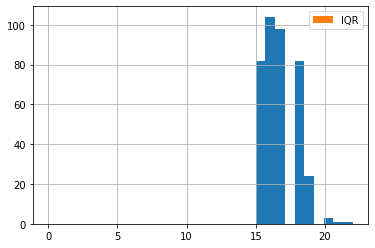

In [100]:
# 3 columns age
analyz_text_col(students.age)
students.age.hist()
analyz_eject(students.age)

In [43]:
#4 address
analyz_text_col(students.address)


 Data  ADDRESS
address  количество уникальных данных= 2


,address
U,295
R,83


количество отсутствующих данных =  17


In [6]:
# 5 family_size
analyz_text_col(students.family_size)

 Data  FAMILY_SIZE
family_size  количество уникальных данных= 2


,family_size
GT3,261
LE3,107


количество отсутствующих данных =  27


In [49]:
# 6 parent_status
analyz_text_col(students.parent_status)
#students.parent_status.hist()

 Data  PARENT_STATUS
parent_status  количество уникальных данных= 2


,parent_status
T,314
A,36


количество отсутствующих данных =  45


In [50]:
#7 mum_edu
analyz_text_col(students.mum_edu)

 Data  MUM_EDU
mum_edu  количество уникальных данных= 5


,mum_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


количество отсутствующих данных =  3


In [13]:
#8 papa_edu

correct_absent(students.papa_edu) # очищаем данные Не могу понять почему работает не стабильно

students.papa_edu = students.papa_edu.astype(str).apply(lambda x: None if x.strip() == '40.0' else x)
students.papa_edu = students.papa_edu.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)
students.papa_edu = students.papa_edu.astype(str).apply(lambda x: None if x.strip() == 'None' else x)
analyz_text_col(students.papa_edu)

print("Значений, встретившихся в столбце более 10 раз:", (students.papa_edu.value_counts()>10).sum())
students.loc[:, ['papa_edu']].info()




 Data  PAPA_EDU
papa_edu  количество уникальных данных= 5


,papa_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2


количество отсутствующих данных =  25
Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
papa_edu    370 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


 Data  MUM_JOB
mum_job  количество уникальных данных= 5


,mum_job
other,133
services,98
at_home,58
teacher,55
health,32


количество отсутствующих данных =  19


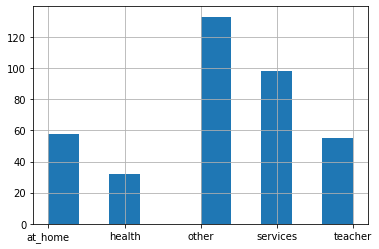

In [104]:
# 9 mum_job 
analyz_text_col(students.mum_job) 
students.mum_job.hist()

 Data  PAPA_JOB
papa_job  количество уникальных данных= 5


,papa_job
other,197
services,102
teacher,29
at_home,16
health,15


количество отсутствующих данных =  36


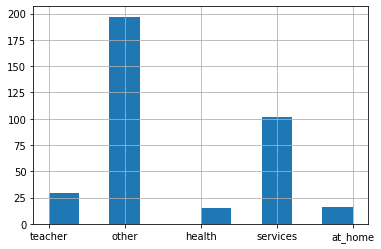

In [110]:
# 10 papa_job
analyz_text_col(students.papa_job) 
students.papa_job.hist()


 Data  REASON
reason  количество уникальных данных= 4


,reason
course,137
home,104
reputation,103
other,34


количество отсутствующих данных =  17


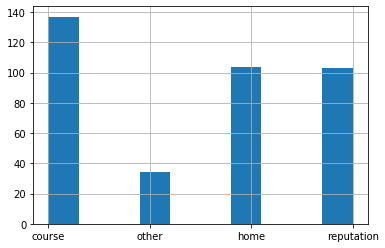

In [106]:
# 11 reason 
analyz_text_col(students.reason) 
students.reason.hist()

 Data  GUARDIAN
guardian  количество уникальных данных= 3


,guardian
mother,250
father,86
other,28


количество отсутствующих данных =  31


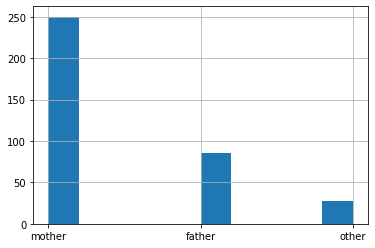

In [107]:
# 12 guardian
analyz_text_col(students.guardian) 
students.guardian.hist()       

 Data  TRAVELTIME
traveltime  количество уникальных данных= 4


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


количество отсутствующих данных =  28
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


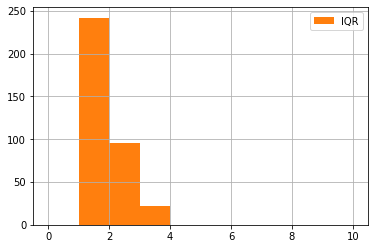

In [7]:
#13 traveltime 
analyz_text_col(students.traveltime ) 
students.traveltime.hist()    
analyz_eject(students.traveltime)

 Data  STUDYTIME
studytime  количество уникальных данных= 4


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


количество отсутствующих данных =  7
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


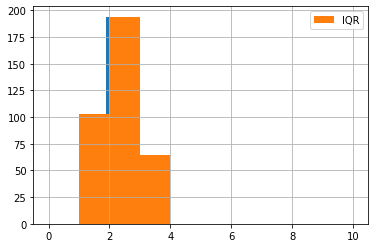

In [113]:
#14 studytime 
analyz_text_col(students.studytime) 
students.studytime.hist()  
analyz_eject(students.studytime)

In [19]:
#15 failures 
analyz_text_col(students.failures)


 Data  FAILURES
failures  количество уникальных данных= 4


,failures
0.0,293
1.0,49
2.0,16
3.0,15


количество отсутствующих данных =  22


In [12]:
#16 schoolsup 
analyz_text_col(students.schoolsup)

 Data  SCHOOLSUP
schoolsup  количество уникальных данных= 2


,schoolsup
no,335
yes,51


количество отсутствующих данных =  9


In [8]:
# 17 famsup 
analyz_text_col(students.famsup)

 Data  FAMSUP
famsup  количество уникальных данных= 2


,famsup
yes,219
no,137


количество отсутствующих данных =  39


In [15]:
#18 paid
analyz_text_col(students.paid)      

 Data  PAID
paid  количество уникальных данных= 2


,paid
no,200
yes,155


количество отсутствующих данных =  40


In [16]:
#19 activities
analyz_text_col(students.activities)

 Data  ACTIVITIES
activities  количество уникальных данных= 2


,activities
yes,195
no,186


количество отсутствующих данных =  14


In [17]:
 #20 nursery 
analyz_text_col(students.nursery)

 Data  NURSERY
nursery  количество уникальных данных= 2


,nursery
yes,300
no,79


количество отсутствующих данных =  16


 Data  STUDY_GRANULAR
study_granular  количество уникальных данных= 4


,study_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


количество отсутствующих данных =  7
25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


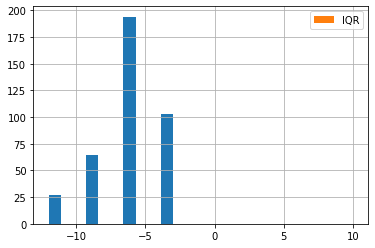

In [32]:
#21 study_granular
analyz_text_col(students.study_granular)
students.study_granular.hist()  
analyz_eject(students.study_granular)

 Data  HIGHER
higher  количество уникальных данных= 2


,higher
yes,356
no,19


количество отсутствующих данных =  20


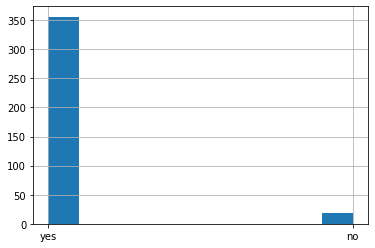

In [33]:
# 22  higher 
analyz_text_col(students.higher)
students.higher.hist()  

 Data  INTERNET
internet  количество уникальных данных= 2


,internet
yes,305
no,56


количество отсутствующих данных =  34


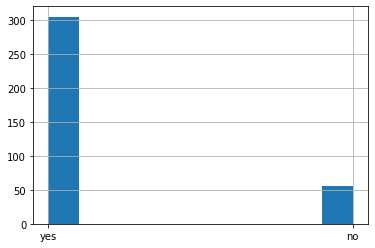

In [34]:
# 23 internet 
analyz_text_col(students.internet)
students.internet.hist()  

In [37]:
#24  romantic
students.romantic = students.romantic.astype(str).apply(lambda x: None if x.strip() == 'NaN' else x) 
analyz_text_col(students.romantic)
#students.romantic.hist()  

 Data  ROMANTIC
romantic  количество уникальных данных= 3


,romantic
no,235
yes,123
nan,31


количество отсутствующих данных =  0


In [20]:
#25 fam_rel 
analyz_text_col(students.family_relation)
correct_absent(students.family_relation) # очищаем данные Не могу понять почему работает не стабильно
#
#students.family_relation = students.family_relation.astype(str).apply(lambda x: None if x.strip() == '-1.0' else x) 
students.family_relation = students.family_relation.astype(str).apply(lambda x: None if x.strip() == 'nan' else x) 
students.family_relation = students.family_relation.astype(str).apply(lambda x: None if x.strip() == 'None' else x) 
analyz_text_col(students.family_relation)


 Data  FAMILY_RELATION
family_relation  количество уникальных данных= 5


,family_relation
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7


количество отсутствующих данных =  28
 Data  FAMILY_RELATION
family_relation  количество уникальных данных= 5


,family_relation
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7


количество отсутствующих данных =  28


 Data  FREETIME
freetime  количество уникальных данных= 5


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


количество отсутствующих данных =  11


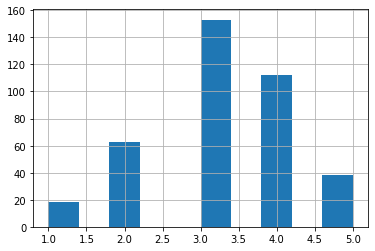

In [59]:
#26  freetime  
analyz_text_col(students.freetime)
students.freetime.hist()  

 Data  GO_OUT
go_out  количество уникальных данных= 5


,go_out
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


количество отсутствующих данных =  8


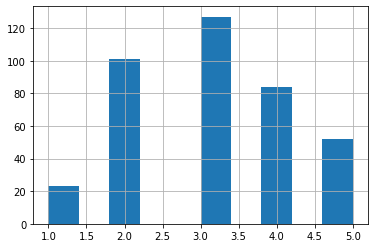

In [60]:
# 27 go_out  
analyz_text_col(students.go_out)
students.go_out.hist()  

 Data  HEALTH
health  количество уникальных данных= 5


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


количество отсутствующих данных =  15


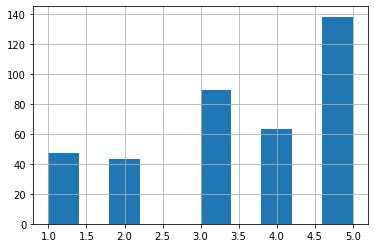

In [61]:
#28 health 
analyz_text_col(students.health)
students.health.hist()  


 Data  ABSENCES
absences  количество уникальных данных= 36


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


количество отсутствующих данных =  12
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


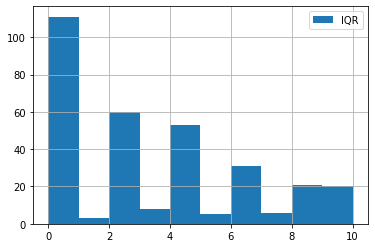

In [64]:
# 29 absences
analyz_text_col(students.absences)
#students.absences.hist()  
analyz_eject(students.absences)

 Data  SCORE_MATH
score_math  количество уникальных данных= 18


,score_math
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


количество отсутствующих данных =  0
25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score_math, dtype: float64

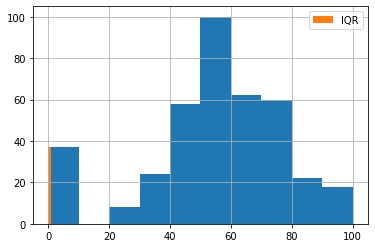

In [29]:
#30 score_math
analyz_text_col(students.score_math)
students.score_math.hist()  
IQR, perc25,perc75=analyz_eject(students.score_math)
students.score_math.describe()
students = students.loc[students.score_math.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
students.score_math.describe()

In [31]:
# corel analyz

students.corr()

,age,mum_edu,traveltime,studytime,failures,study_granular,freetime,go_out,health,absences,score_math
age,1.000000,-0.146736,0.073146,-0.018227,0.205919,0.018227,0.016099,0.121115,-0.068103,0.096628,-0.155726
mum_edu,-0.146736,1.000000,-0.165838,0.081032,-0.240319,-0.081032,0.038265,0.072320,-0.048331,-0.014047,0.213349
traveltime,0.073146,-0.165838,1.000000,-0.105910,0.049738,0.105910,-0.026299,0.032629,-0.011724,-0.048242,-0.070559
studytime,-0.018227,0.081032,-0.105910,1.000000,-0.181947,-1.000000,-0.125066,-0.053831,-0.079180,-0.025707,0.115741
failures,0.205919,-0.240319,0.049738,-0.181947,1.000000,0.181947,0.091608,0.107747,0.088013,0.058166,-0.344338
study_granular,0.018227,-0.081032,0.105910,-1.000000,0.181947,1.000000,0.125066,0.053831,0.079180,0.025707,-0.115741
freetime,0.016099,0.038265,-0.026299,-0.125066,0.091608,0.125066,1.000000,0.296338,0.064315,0.010745,0.019026
go_out,0.121115,0.072320,0.032629,-0.053831,0.107747,0.053831,0.296338,1.000000,-0.018026,-0.047954,-0.129685
health,-0.068103,-0.048331,-0.011724,-0.079180,0.088013,0.079180,0.064315,-0.018026,1.000000,-0.016165,-0.070460
absences,0.096628,-0.014047,-0.048242,-0.025707,0.058166,0.025707,0.010745,-0.047954,-0.016165,1.000000,0.065283


In [39]:
# test Student
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score_math'], 
                        students.loc[students.loc[:, column] == comb[1], 'score_math']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex', 'address', 'family_size', 'parent_status', 'mum_edu', 'papa_edu', 'mum_job', 'papa_job', 'reason', 'guardian','studytime', 'failures', 'schoolsup', 'famsup','activities', 'nursery', 'study_granular', 'higher', 'internet',
'romantic', 'family_relation']:
    get_stat_dif(col)
students_for_math=students.loc[:, ['score_math', 'mum_edu', 'studytime','absences','address', 'mum_job','higher']]
students_for_math.head()

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mum_edu
Найдены статистически значимые различия для колонки mum_job
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


,score_math,mum_edu,studytime,absences,address,mum_job,higher
0,30.0,4.0,2.0,6.0,U,at_home,yes
1,30.0,1.0,2.0,4.0,U,at_home,yes
2,50.0,1.0,2.0,10.0,U,at_home,yes
3,75.0,4.0,3.0,2.0,U,health,yes
4,50.0,3.0,2.0,4.0,U,other,yes
